In [2]:
import os
import math

import cv2
import matplotlib.pyplot as plt
import numpy as np


In [3]:
im_file = 'images/subject01_happy.png'
im = np.float32(cv2.imread(im_file, cv2.IMREAD_GRAYSCALE) / 255.0)

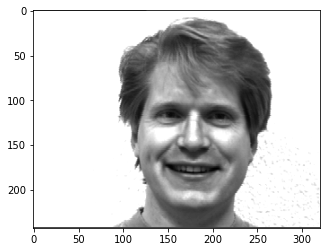

In [4]:
plt.imshow(im, cmap='gray')

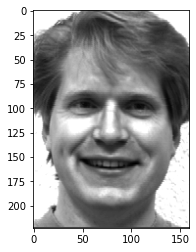

In [5]:
im_crop = im[20:, 100:260] 
plt.imshow(im_crop, cmap='gray')

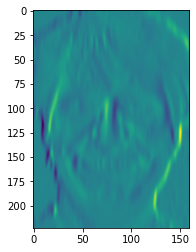

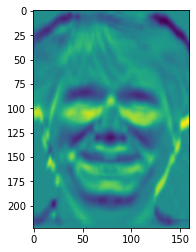

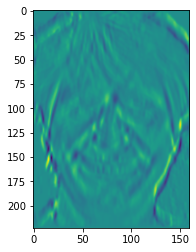

In [6]:

# Blur image
sigma = 5
low_pass = cv2.getGaussianKernel(3*sigma, sigma)
im_blur = cv2.filter2D(src=im_crop, ddepth=-1, kernel=low_pass)

# Use Sobel edge detection for x, y and combined
sobelx = cv2.Sobel(src=im_blur, ddepth=-1, dx=1, dy=0, ksize=sigma) 
sobely = cv2.Sobel(src=im_blur, ddepth=-1, dx=0, dy=1, ksize=sigma) 
sobelxy = cv2.Sobel(src=im_blur, ddepth=-1, dx=1, dy=1, ksize=sigma)

plt.imshow(sobelx)
plt.show()
plt.imshow(sobely)
plt.show()
plt.imshow(sobelxy)
plt.show()
#Sobel in the y direction seems best for detecting facial features

In [7]:
im_file = 'images/subject03_normal.png'
im = np.float32(cv2.imread(im_file, cv2.IMREAD_GRAYSCALE) / 255.0)

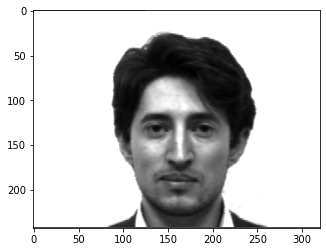

In [8]:
plt.imshow(im, cmap='gray')

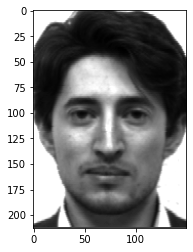

In [9]:
im_crop = im[30:, 90:240]
plt.imshow(im_crop, cmap='gray')

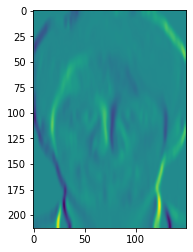

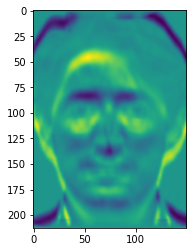

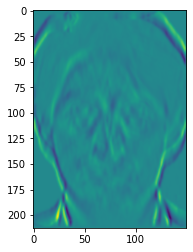

In [10]:

# Blur image
sigma = 5
low_pass = cv2.getGaussianKernel(3*sigma, sigma)
im_blur = cv2.filter2D(src=im_crop, ddepth=-1, kernel=low_pass)

# Use Sobel edge detection for x, y and combined
sobelx = cv2.Sobel(src=im_blur, ddepth=-1, dx=1, dy=0, ksize=sigma) 
sobely = cv2.Sobel(src=im_blur, ddepth=-1, dx=0, dy=1, ksize=sigma) 
sobelxy = cv2.Sobel(src=im_blur, ddepth=-1, dx=1, dy=1, ksize=sigma)

plt.imshow(sobelx)
plt.show()
plt.imshow(sobely)
plt.show()
plt.imshow(sobelxy)
plt.show()
#Sobel in the y direction seems best for detecting facial features

In [11]:
im_file = 'images/subject05_normal.png'
im = np.float32(cv2.imread(im_file, cv2.IMREAD_GRAYSCALE) / 255.0)

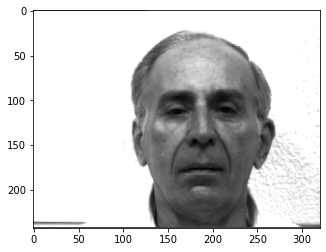

In [12]:
plt.imshow(im, cmap='gray')

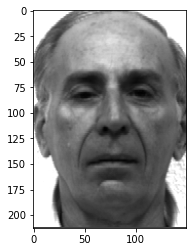

In [13]:
im_crop = im[30:, 110:260]
plt.imshow(im_crop, cmap='gray')

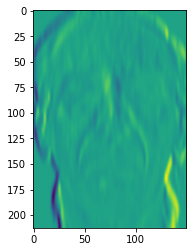

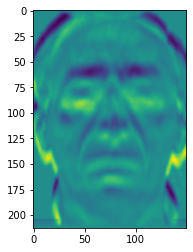

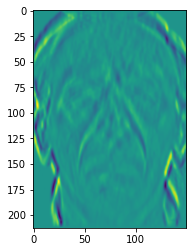

In [14]:

# Blur image
sigma = 5
low_pass = cv2.getGaussianKernel(3*sigma, sigma)
im_blur = cv2.filter2D(src=im_crop, ddepth=-1, kernel=low_pass)

# Use Sobel edge detection for x, y and combined
sobelx = cv2.Sobel(src=im_blur, ddepth=-1, dx=1, dy=0, ksize=sigma) 
sobely = cv2.Sobel(src=im_blur, ddepth=-1, dx=0, dy=1, ksize=sigma) 
sobelxy = cv2.Sobel(src=im_blur, ddepth=-1, dx=1, dy=1, ksize=sigma)

plt.imshow(sobelx)
plt.show()
plt.imshow(sobely)
plt.show()
plt.imshow(sobelxy)
plt.show()
#Sobel in the y direction seems best for detecting facial features

In [15]:
im5normal = np.float32(cv2.imread('images/subject05_normal.png', cv2.IMREAD_GRAYSCALE) / 255.0)
im5normal_crop = im5normal[30:, 110:260]

im3normal = np.float32(cv2.imread('images/subject03_normal.png', cv2.IMREAD_GRAYSCALE) / 255.0)
im3normal_crop = im3normal[30:, 90:240]

im1happy = np.float32(cv2.imread('images/subject01_happy.png', cv2.IMREAD_GRAYSCALE) / 255.0)
im1happy_crop = im1happy[20:, 100:260] 


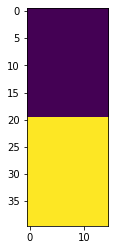

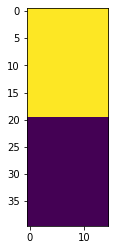

In [124]:
ysize = 20
xsize = 15

haar1 = np.concatenate( (np.zeros([ysize, xsize]), np.ones([ysize, xsize])),axis=0) - 0.5
plt.imshow(haar1)
plt.show()

ysize2 = 20
xsize2 = 25

haar2 = haar1*-1
plt.imshow(haar2)
plt.show()


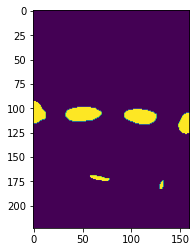

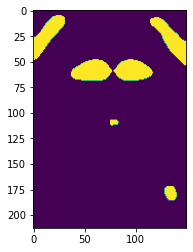

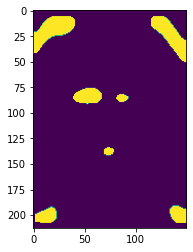

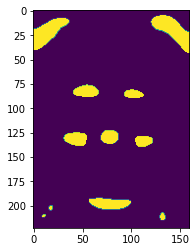

In [129]:
har_fil1 = cv2.filter2D(src=im1happy_crop, ddepth=-1, kernel=haar2)
thresh1 = (har_fil1 < np.min(har_fil1)*0.5)*1.0
plt.imshow(thresh1)
plt.show()

har_fil1 = cv2.filter2D(src=im5normal_crop, ddepth=-1, kernel=haar1)
thresh1 = (har_fil1 < np.min(har_fil1)*0.5)*1.0
plt.imshow(thresh1)
plt.show()

har_fil1 = cv2.filter2D(src=im3normal_crop, ddepth=-1, kernel=haar1)
thresh2 = (har_fil1 < np.min(har_fil1)*0.5)*1.0
plt.imshow(thresh2)
plt.show()

har_fil1 = cv2.filter2D(src=im1happy_crop, ddepth=-1, kernel=haar1)
thresh3 = (har_fil1 < np.min(har_fil1)*0.5)*1.0
plt.imshow(thresh3)
plt.show()


In [108]:
params = cv2.SimpleBlobDetector_Params()

params.minThreshold = 10;    # the graylevel of images
params.maxThreshold = 200;

params.filterByColor = True
params.blobColor = 255

params.minCircularity = 0.2

# Filter by Area
params.filterByArea = True
params.minArea = 100
params.maxArea = 100000

detector = cv2.SimpleBlobDetector_create(params)

new_im = (thresh1*100).astype("uint8")
# Detect blobs.
keypoints = detector.detect(new_im)

In [106]:
keypoints

[<KeyPoint 0x7ff4a591f4e0>,
 <KeyPoint 0x7ff436858d20>,
 <KeyPoint 0x7ff436b63b70>]

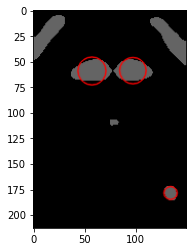

In [107]:
plt.imshow(cv2.drawKeypoints(new_im, keypoints, 0, (255, 0, 0), 
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) )

220.0